<a href="https://colab.research.google.com/github/DiKachura/machine_learning/blob/main/%D0%B2%D0%B0%D1%85_%D1%84%D0%B8%D0%BD%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5_%D0%BD%D0%B0%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# univariate multi-step vector-output stacked lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import pandas as pd

# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [2]:
# define input sequence
raw_seq = pd.read_excel('/content/первая_выборка.xlsx')['iav/ilim+']
# choose a number of time steps
n_steps_in, n_steps_out = 42, 41
# split into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)

In [3]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [4]:
from keras.layers import Conv1D, MaxPooling1D, Flatten

# Определение модели
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(200, activation='tanh', return_sequences=True))
model.add(LSTM(200, activation='tanh'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')

In [46]:
# fit model
model.fit(X, y, epochs=100, verbose=0)

In [47]:
# demonstrate prediction
x_input = array(pd.read_excel('/content/тестовая_выборка.xlsx')['iav/ilim+'])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[0.82122815 0.81882584 0.835392   0.82317173 0.85694325 0.8590298
  0.8484343  0.84123445 0.88517517 0.8493054  0.86494565 0.8698938
  0.84834313 0.89284474 0.8914503  0.89150727 0.9034774  0.9208566
  0.9018785  0.929725   0.9152181  0.9292596  0.9376166  0.9235755
  0.9357384  0.96195596 0.9650764  0.9431148  0.96241766 0.97863245
  0.969982   0.97260976 0.9850559  0.96676517 1.0037103  0.97383523
  1.0122195  0.98830354 1.0029181  1.016565   1.032105  ]]


In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Вычисление среднеквадратичной ошибки (MSE)
mse = mean_squared_error(y[0], yhat[0])
print("Mean Squared Error (MSE):", mse)

# Вычисление средней абсолютной ошибки (MAE)
mae = mean_absolute_error(y[0], yhat[0])
print("Mean Absolute Error (MAE):", mae)

# Вычисление корня из среднеквадратичной ошибки (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Вычисление средней абсолютной процентной ошибки (MAPE)
mape = np.mean(np.abs((y[0] - yhat) / y[0])) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Squared Error (MSE): 0.04127330785461615
Mean Absolute Error (MAE): 0.20090603514555028
Root Mean Squared Error (RMSE): 0.2031583319842338
Mean Absolute Percentage Error (MAPE): 28.838554075820266


In [56]:
# Сохранение весов модели
model.save_weights('/content/last_model_weights_conv_lstm_200_tanh_100.h5')

# Сохранение архитектуры модели
with open('/content/last_model_architecture_conv_lstm_200_tanh_100.json', 'w') as f:
    f.write(model.to_json())

In [49]:
# Исходная последовательность точек
input_sequence = x_input[0]  # Берем первую последовательность из обучающих данных
input_sequence

array([[2.9046e-16],
       [3.6352e-02],
       [7.1152e-02],
       [1.0493e-01],
       [1.3787e-01],
       [1.7013e-01],
       [2.0171e-01],
       [2.3270e-01],
       [2.6305e-01],
       [2.9295e-01],
       [3.2233e-01],
       [3.5115e-01],
       [3.7937e-01],
       [4.0720e-01],
       [4.3450e-01],
       [4.6124e-01],
       [4.8737e-01],
       [5.1314e-01],
       [5.3842e-01],
       [5.6315e-01],
       [5.8731e-01],
       [6.1119e-01],
       [6.3463e-01],
       [6.5760e-01],
       [6.8008e-01],
       [7.0205e-01],
       [7.2350e-01],
       [7.4441e-01],
       [7.6477e-01],
       [7.8488e-01],
       [8.0454e-01],
       [8.2370e-01],
       [8.4234e-01],
       [8.6047e-01],
       [8.7806e-01],
       [8.9512e-01],
       [9.1161e-01],
       [9.2792e-01],
       [9.4381e-01],
       [9.5924e-01],
       [9.7419e-01],
       [9.8868e-01]])

In [50]:
# Подготовка состояний модели для предсказания
model.reset_states()
model.predict(input_sequence.reshape(1, n_steps_in, n_features))

1/1 [==============================] - 0s 32ms/step


array([[0.82122815, 0.81882584, 0.835392  , 0.82317173, 0.85694325,
        0.8590298 , 0.8484343 , 0.84123445, 0.88517517, 0.8493054 ,
        0.86494565, 0.8698938 , 0.84834313, 0.89284474, 0.8914503 ,
        0.89150727, 0.9034774 , 0.9208566 , 0.9018785 , 0.929725  ,
        0.9152181 , 0.9292596 , 0.9376166 , 0.9235755 , 0.9357384 ,
        0.96195596, 0.9650764 , 0.9431148 , 0.96241766, 0.97863245,
        0.969982  , 0.97260976, 0.9850559 , 0.96676517, 1.0037103 ,
        0.97383523, 1.0122195 , 0.98830354, 1.0029181 , 1.016565  ,
        1.032105  ]], dtype=float32)

In [51]:
# Предсказание последовательности точек до конца графика
predicted_sequence = np.expand_dims(input_sequence.copy(), axis=0)
predicted_sequence

array([[[2.9046e-16],
        [3.6352e-02],
        [7.1152e-02],
        [1.0493e-01],
        [1.3787e-01],
        [1.7013e-01],
        [2.0171e-01],
        [2.3270e-01],
        [2.6305e-01],
        [2.9295e-01],
        [3.2233e-01],
        [3.5115e-01],
        [3.7937e-01],
        [4.0720e-01],
        [4.3450e-01],
        [4.6124e-01],
        [4.8737e-01],
        [5.1314e-01],
        [5.3842e-01],
        [5.6315e-01],
        [5.8731e-01],
        [6.1119e-01],
        [6.3463e-01],
        [6.5760e-01],
        [6.8008e-01],
        [7.0205e-01],
        [7.2350e-01],
        [7.4441e-01],
        [7.6477e-01],
        [7.8488e-01],
        [8.0454e-01],
        [8.2370e-01],
        [8.4234e-01],
        [8.6047e-01],
        [8.7806e-01],
        [8.9512e-01],
        [9.1161e-01],
        [9.2792e-01],
        [9.4381e-01],
        [9.5924e-01],
        [9.7419e-01],
        [9.8868e-01]]])

In [54]:
while len(predicted_sequence) < len(raw_seq):
    # Предсказание следующего шага
    next_step = model.predict(predicted_sequence[-n_steps_in:].reshape(1, n_steps_in, n_features))
    #print(next_step.T)
    #print(predicted_sequence)
    predicted_sequence = np.concatenate((predicted_sequence, next_step.T), axis=0)

1/1 [==============================] - 0s 31ms/step


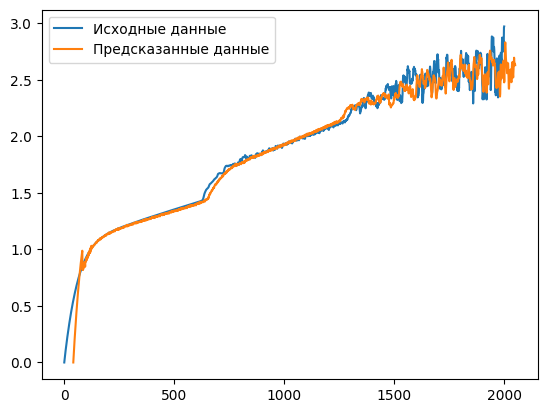

In [55]:
# Визуализация предсказанной последовательности
import matplotlib.pyplot as plt

plt.plot(raw_seq, label='Исходные данные')
plt.plot(range(n_steps_in-1, len(predicted_sequence)+n_steps_in-1), predicted_sequence[:, 0], label='Предсказанные данные')
plt.legend()
plt.show()